# Fortune 1000 companies - EDA and Descriptive analysis

The Fortune 1000 is an annual list compiled and published by Fortune magazine that ranks 500 of the largest United States corporations by total revenue for their respective fiscal years. The list includes publicly held companies, along with privately held companies for which revenues are publicly available. We have derived insights regarding the drivers using different paramters we have analyzed from the dataset about the companies that have made it to the prestigious Fortune list.

##### Packages used: Pandas, numpy, matplotlib, seaborn, random and plotly

##### Team:

- Aditya Gupta
- Adithya B Umamahesh
- Karandeep S Mann
- Siddhant Sharma
- Vinod Iyer R

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

data = pd.read_csv("Fortune_1000.csv")

Sample display

In [3]:
data.head()

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,523964.0,14881.0,2200000,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,411690
1,Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,yes,no,yes,5.0,Jeffrey P. Bezos,https://www.amazon.com,AMZN,1637405
2,Exxon Mobil,3,-1.0,264938.0,14340.0,74900,Energy,Irving,TX,no,no,no,yes,2.0,Darren W. Woods,https://www.exxonmobil.com,XOM,177923
3,Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,https://www.apple.com,AAPL,2221176
4,CVS Health,5,3.0,256776.0,6634.0,290000,Health Care,Woonsocket,RI,no,no,yes,yes,8.0,Karen S. Lynch,https://www.cvshealth.com,CVS,98496


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             998 non-null    float64
 5   num. of employees  1000 non-null   int64  
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           500 non-null    object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                992 non-null    object 
 15  Website            1000 non-null   object 
 16  Ticker             938 no

Removing whitespaces and converting to lowercase

In [5]:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.lower()

Checking for Null values

In [6]:
data.isna().sum()

company                0
rank                   0
rank_change            0
revenue                0
profit                 2
num. of employees      0
sector                 0
city                   0
state                  0
newcomer             500
ceo_founder            0
ceo_woman              0
profitable             0
prev_rank              0
ceo                    8
website                0
ticker                62
market cap            40
dtype: int64

Removing profit column for 2 companies (missing values)

In [7]:
data.loc[data['profit'].isna()]
data = data.drop([667,716])

Replacing Null Columns

In [8]:
data['ceo'].fillna('N/A', inplace = True)
data['newcomer'].fillna('N/A', inplace = True)
data['ticker'].fillna('N/A', inplace = True)
data['market cap'].fillna(0, inplace = True)

Replacing '-' To 0 in market cap

In [9]:
data['market cap'] = data['market cap'].replace("-",0)

Converting data type of Market Cap to float

In [10]:
data["market cap"] = data['market cap'].astype(float)

Removing blanks from the previous rank column

In [11]:
data['prev_rank'] = data['prev_rank'].replace(r'^\s*$', np.NaN, regex=True)
data['prev_rank'].fillna('N/A', inplace = True)

In [12]:
data2 = data.iloc[:500,:]
data3 = data.iloc[:1000,:]
count1 = data3.groupby('newcomer').count().iloc[:,1]
count1

newcomer
N/A    498
no     477
yes     23
Name: rank, dtype: int64

## EDA (Exploratory Data Analysis)

Piecharts

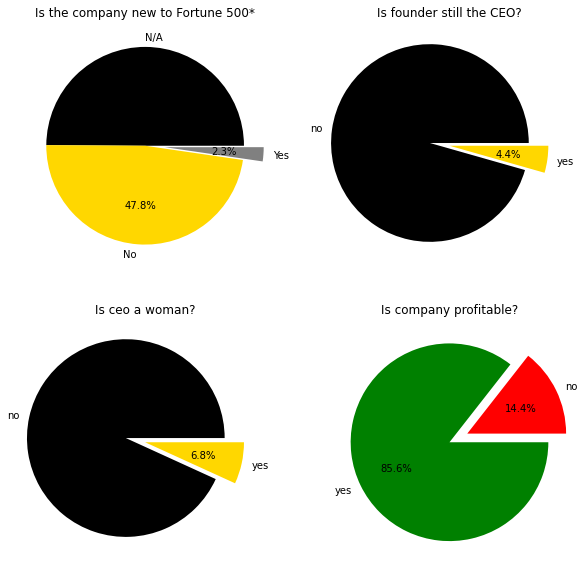

In [15]:
fig = plt.figure(figsize = (10,10)) 
label = ['no', 'yes']

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

myexplode = [0.2, 0]

count1 = data3.groupby('newcomer').count().iloc[:,1]
count2 = data.groupby('ceo_founder').count().iloc[0:,1]
count3 = data.groupby('ceo_woman').count().iloc[0:,1]
count4 = data.groupby('profitable').count().iloc[0:,1]

ax1.pie(count1, labels = ['N/A','No', 'Yes'], autopct="%1.1f%%", explode = [0,0,0.2], colors = ["black", "gold","gray"])
ax1.set_title("Is the company new to Fortune 500*")

ax2.pie(count2, labels = ['no', 'yes'], autopct="%1.1f%%", explode = myexplode, colors = ["black", "gold"])
ax2.set_title("Is founder still the CEO?")

ax3.pie(count3, labels = ['no', 'yes'], autopct="%1.1f%%",explode = myexplode, colors = ["black", "gold"])
ax3.set_title("Is ceo a woman?")

ax4.pie(count4, labels = ['no', 'yes'], autopct="%1.1f%%",explode = myexplode, colors = ["red", "green"])
ax4.set_title("Is company profitable?")

plt.show()

In [16]:
count4 = data.groupby('profitable').count().iloc[0:,1]

profitable
no     144
yes    854
Name: rank, dtype: int64

In [13]:
count1

newcomer
N/A    498
no     477
yes     23
Name: rank, dtype: int64

## Descriptive Summary, Boxplots, and Histograms

In [79]:
#b) Summary 
data[['revenue', 'profit', 'num. of employees', 'market cap']].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,revenue,profit,num. of employees,market cap
count,998.00,998.00,998.00,998.00
mean,15927.14,1344.70,34669.92,32869.20
std,34793.40,4515.84,92108.22,126448.80
min,1990.30,-8506.00,51.00,0.00
25%,3163.80,110.65,6419.50,1475.30
50%,5668.05,380.70,13000.00,6033.70
75%,12843.92,1061.08,29464.00,20018.60
max,523964.00,81417.00,2200000.00,2221176.00


In [80]:
#Distinction of Fortune 1000 companies based on Market Cap

conditions = [
    (data['market cap'] > 300) & (data['market cap'] <= 2000),
    (data['market cap'] > 2000) & (data['market cap'] <= 10000),
    (data['market cap'] > 10000)]

values = ['small cap', 'mid cap', 'large cap']

data['market cap type'] = np.select(conditions, values)

smallcap = data[data['market cap type'] == 'small cap']
midcap = data[data['market cap type'] == 'mid cap']
largecap = data[data['market cap type'] == 'large cap']

Boxplots

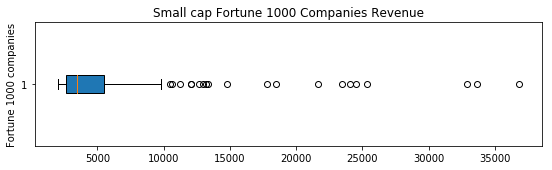

In [81]:
# Boxplots (Revenue : (Smallcap))
figg = plt.figure(figsize = (20,5))

bp1 = figg.add_subplot(221)
bp1.boxplot(smallcap['revenue'] ,vert = False, patch_artist = True)
bp1.set_title("Small cap Fortune 1000 Companies Revenue")
bp1.set_ylabel('Fortune 1000 companies')

plt.show()

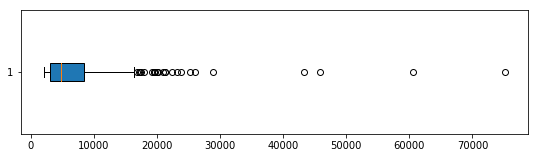

In [82]:
# Boxplots (Revenue : (Midcap))
figg = plt.figure(figsize = (20,5))

bp1 = figg.add_subplot(221)
bp1.boxplot(midcap['revenue'] ,
vert = False, patch_artist = True)
bp1.set_title
("Mid cap Fortune 1000 Companies Revenue")
bp1.set_ylabel
('Fortune 1000 companies')

plt.show()

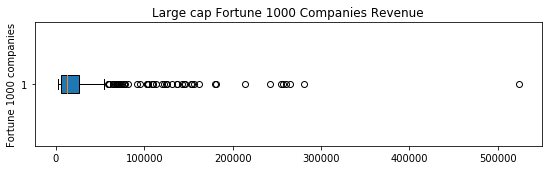

In [83]:
#Boxplots (Revenue : (Largecap))
figg = plt.figure(figsize = (20,5))

bp1 = figg.add_subplot(221)
bp1.boxplot(largecap['revenue'] ,vert = False, patch_artist = True)
bp1.set_title("Large cap Fortune 1000 Companies Revenue")
bp1.set_ylabel('Fortune 1000 companies')

plt.show()

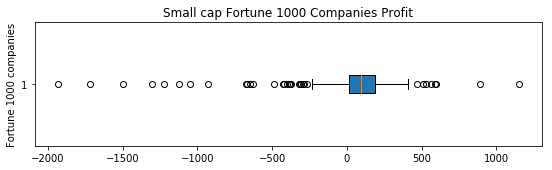

In [84]:
#Boxplots (Profit : (Smallcap))
figg = plt.figure(figsize = (20,5))

bp1 = figg.add_subplot(221)
bp1.boxplot(smallcap['profit'] ,vert = False, patch_artist = True)
bp1.set_title("Small cap Fortune 1000 Companies Profit")
bp1.set_ylabel('Fortune 1000 companies')

plt.show()

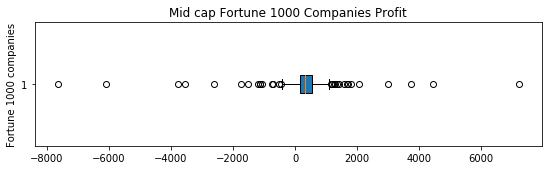

In [85]:
#Boxplots (Profit : (Midcap))
figg = plt.figure(figsize = (20,5))

bp1 = figg.add_subplot(221)
bp1.boxplot(midcap['profit'] ,vert = False, patch_artist = True)
bp1.set_title("Mid cap Fortune 1000 Companies Profit")
bp1.set_ylabel('Fortune 1000 companies')

plt.show()

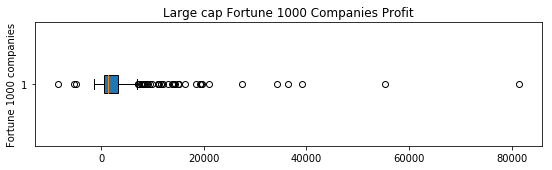

In [86]:
#Boxplots (Profit : (Largecap))
figg = plt.figure(figsize = (20,5))

bp1 = figg.add_subplot(221)
bp1.boxplot(largecap['profit'] ,vert = False, patch_artist = True)
bp1.set_title("Large cap Fortune 1000 Companies Profit")
bp1.set_ylabel('Fortune 1000 companies')

plt.show()

Histograms

Text(0.5, 1.0, 'Revenue Distribution')

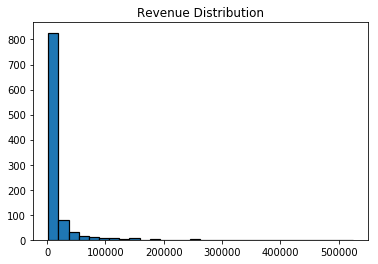

In [87]:
# Histograms

plt.hist(data['revenue'], bins = 30, edgecolor='black', linewidth=1.2)
plt.title("Revenue Distribution")

(array([  4.,   6., 556., 341.,  49.,  16.,   7.,   7.,   1.,   5.,   0.,
          1.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-8506.        , -5508.56666667, -2511.13333333,   486.3       ,
         3483.73333333,  6481.16666667,  9478.6       , 12476.03333333,
        15473.46666667, 18470.9       , 21468.33333333, 24465.76666667,
        27463.2       , 30460.63333333, 33458.06666667, 36455.5       ,
        39452.93333333, 42450.36666667, 45447.8       , 48445.23333333,
        51442.66666667, 54440.1       , 57437.53333333, 60434.96666667,
        63432.4       , 66429.83333333, 69427.26666667, 72424.7       ,
        75422.13333333, 78419.56666667, 81417.        ]),
 <a list of 30 Patch objects>)

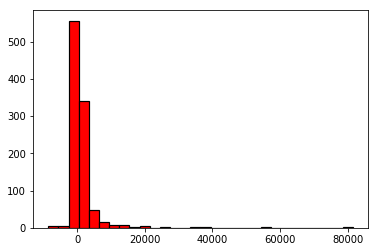

In [88]:
plt.hist(data['profit'], bins = 30, edgecolor='black', linewidth=1.2, color = 'r')

Text(0.5, 1.0, 'Distribution of Number of Employees (10^6)')

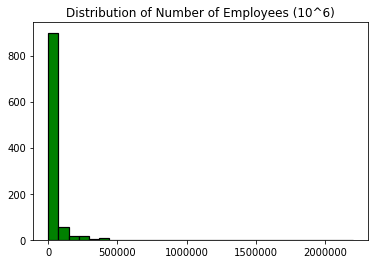

In [89]:
plt.hist(data['num. of employees'], bins = 30, edgecolor='black', linewidth=1.2, color = 'g')
plt.title("Distribution of Number of Employees (10^6)")

Text(0.5, 1.0, 'Distribution of Market Cap (10^6)')

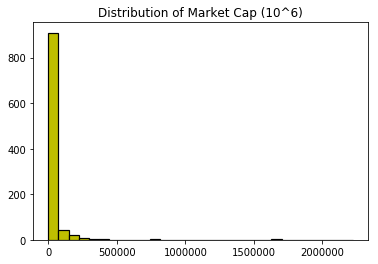

In [90]:
plt.hist(data['market cap'], bins = 30, edgecolor='black', linewidth=1.2, color = 'y')
plt.title("Distribution of Market Cap (10^6)")

## Geographical Analysis

In [91]:
## EDA (Geographical Analysis)

geo = data.groupby("state").agg({'company': 'count', 'revenue': 'mean', 'profit' : 'mean', 'num. of employees' : 'mean'})

geo.sort_values(by=['company'], ascending = False).head(10)


#geo.sort_values(by=['revenue'], ascending = False).head(10)
#geo.sort_values(by=['profit'], ascending = False).head(10)
#geo.sort_values(by=['num. of employees'], ascending = False).head(10)

,company,revenue,profit,num. of employees
state,,,,
CA,121,15472.215702,2220.651240,27214.272727
TX,94,19888.263830,841.078723,27779.957447
NY,89,17923.719101,2405.125843,34917.348315
IL,65,16297.112308,1202.215385,35204.769231
OH,52,15986.594231,689.728846,28921.288462
PA,44,13574.490909,703.722727,30247.090909
FL,38,9847.455263,532.250000,33698.815789
VA,35,12771.382857,974.148571,33754.200000
GA,34,14032.879412,1394.591176,42671.852941


In [92]:
#Chloropleth

states=pd.DataFrame(data.groupby('state')['state'].count().sort_values(ascending=False))
states=states.rename(columns={'state': 'num'})
fig = px.choropleth(locations=states.index, locationmode="USA-states", color=states['num'], 
                    scope="usa",color_continuous_scale=px.colors.sequential.turbid)
fig.show()

Text(0.5, 1.0, 'No. of companies')

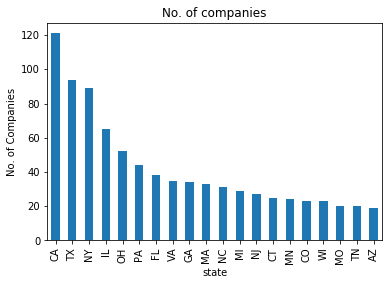

In [93]:
# Bar Chart 1 : State + No. of companies

plot1 = geo.iloc[:,0].sort_values(ascending = False).head(20).plot.bar()
plot1.set_ylabel('No. of Companies')
plt.title("No. of companies")

In [43]:
# Bar Chart 2 : State + Avg. Revenue companies

plot1 = geo.iloc[:,1].sort_values(ascending = False).head(20).plot.bar(color = 'orange')
plot1.set_ylabel('Average Revenue')
plt.title("Average Revenue")

NameError: name 'geo' is not defined

Text(0.5, 1.0, 'Average Profit')

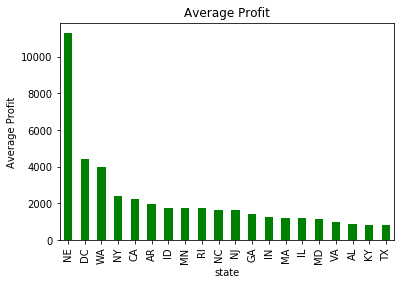

In [95]:
# Bar Chart 3 : State + Avg. Profit companies

plot1 = geo.iloc[:,2].sort_values(ascending = False).head(20).plot.bar(color = 'green')
plot1.set_ylabel('Average Profit')
plt.title("Average Profit")

In [42]:
# Bar Chart 4 : State + Avg. Num. of employees companies

plot1 = geo.iloc[:,3].sort_values(ascending = False).head(20).plot.bar(color = 'brown')
plot1.set_ylabel('Total Number of Employees')
plt.title("Total Number of Employees vs State")

NameError: name 'geo' is not defined

## Scatter Plots and Heatmap

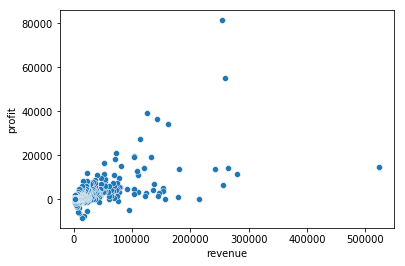

In [97]:
sns.scatterplot(data=data, x="revenue", y="profit")

<AxesSubplot:xlabel='revenue', ylabel='profit'>

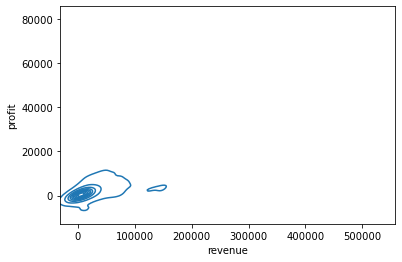

In [39]:
sns.kdeplot(data=data, x="revenue", y="profit")

In [ ]:
data

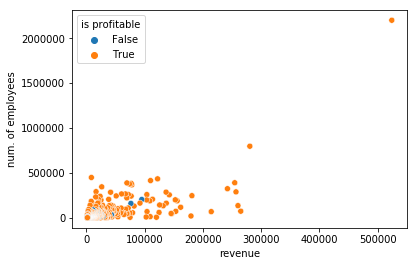

In [98]:
data['is profitable']=data['profit']>0
sns.scatterplot(data=data, x="revenue", y="num. of employees",hue='is profitable')

Heatmap

<AxesSubplot:>

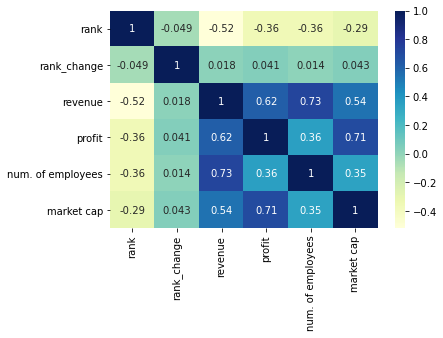

In [23]:
sns.heatmap(data.corr(),cmap = "YlGnBu", annot=True)

## Newcomer Analysis

Text(0.5, 1.0, 'Average Revenue by Newcomer')

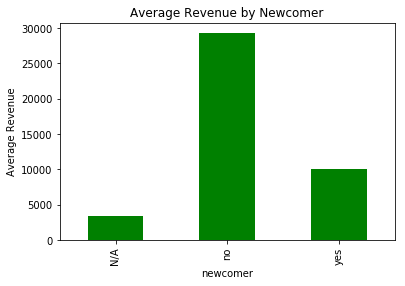

In [100]:
data10 = data.groupby("newcomer").agg({'revenue': 'mean', 'profit' : 'mean'})
plot1 = data10.iloc[:,0].plot.bar(color = 'g')
plot1.set_ylabel('Average Revenue')
plt.title("Average Revenue by Newcomer")

Text(0.5, 1.0, 'Average Profit by Newcomer')

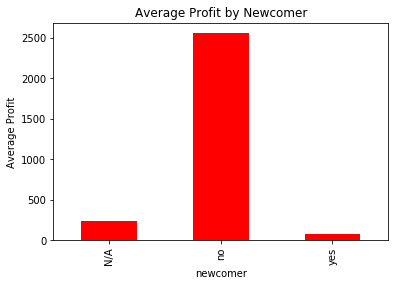

In [101]:
plot2 = data10.iloc[:,1].plot.bar(color = 'r')
plot2.set_ylabel('Average Profit')
plt.title("Average Profit by Newcomer")

## Sector Wise Analysis

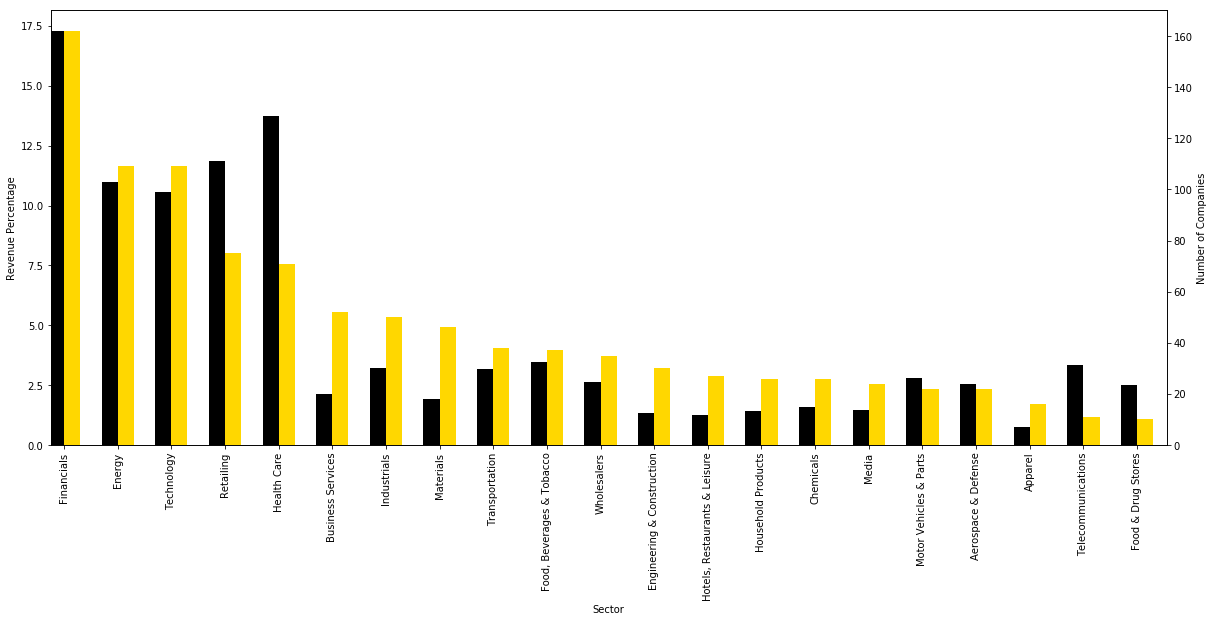

In [102]:
sector_data = data[["revenue","company","sector",]]
sector_data = sector_data.groupby(['sector']).agg({'company':'count','revenue':'sum'})
sector_data['percent'] = (sector_data['revenue'] / sector_data['revenue'].sum()) * 100
sector_data = sector_data.sort_values(by=['company'],ascending = False)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = .3

sector_data.percent.plot(kind='bar', color='black', ax=ax, width=width, position=1,figsize=(20, 8))
sector_data.company.plot(kind='bar', color='gold', ax=ax2, width=width, position=0,figsize=(20, 8))

ax.set_ylabel('Revenue Percentage')
ax2.set_ylabel('Number of Companies')
ax.set_xlabel('Sector')

plt.show()

Text(0.5, 1.0, 'Sector wise Average Revenue Share')

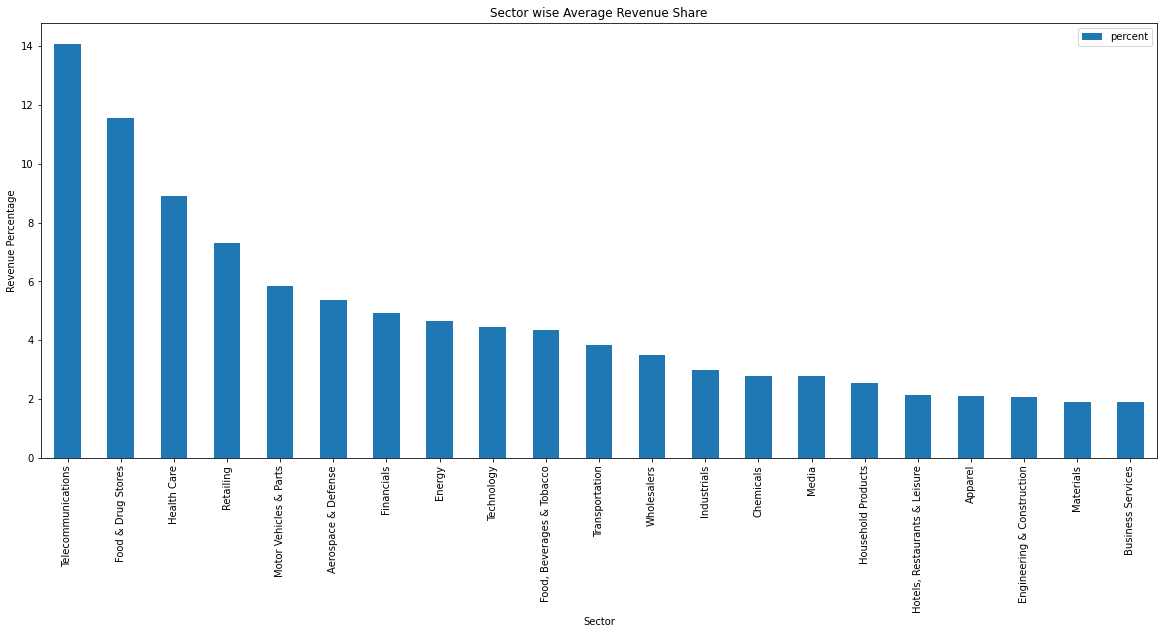

In [40]:
sector_data = data[["revenue","sector",]]
sector_data = sector_data.groupby(['sector']).mean()
sector_data['percent'] = (sector_data['revenue'] / sector_data['revenue'].sum()) * 100
sector_data = sector_data.sort_values(by=['revenue'],ascending = False)
plot = sector_data.plot.bar(y='percent', figsize=(20, 8))
plot.set_xlabel("Sector")
plot.set_ylabel("Revenue Percentage")
plot.set_title("Sector wise Average Revenue Share")

In [41]:
sector_data

,revenue,percent
sector,,
Telecommunications,48519.363636,14.076657
Food & Drug Stores,39783.160000,11.542070
Health Care,30731.895775,8.916077
Retailing,25143.777333,7.294826
Motor Vehicles & Parts,20150.909091,5.846273
Aerospace & Defense,18472.059091,5.359197
Financials,16968.721605,4.923042
Energy,16016.322018,4.646728
Technology,15387.682569,4.464344


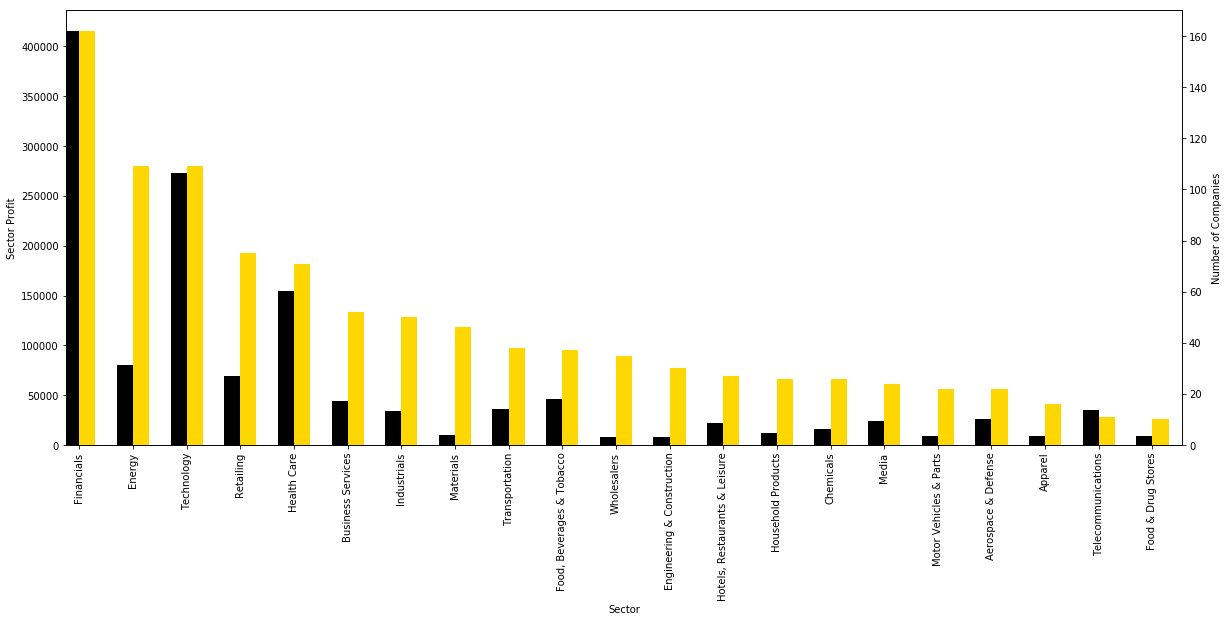

In [104]:
sector_data = data[["profit","company","sector",]]
sector_data = sector_data.groupby(['sector']).agg({'company':'count','profit':'sum'})
#sector_data['percent'] = (sector_data['profit'] / sector_data['profit'].sum()) * 100
sector_data = sector_data.sort_values(by=['company'],ascending = False)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = .3

sector_data.profit.plot(kind='bar', color='black', ax=ax, width=width, position=1,figsize=(20, 8))
sector_data.company.plot(kind='bar', color='gold', ax=ax2, width=width, position=0,figsize=(20, 8))

ax.set_ylabel('Sector Profit')
ax2.set_ylabel('Number of Companies')
ax.set_xlabel('Sector')

plt.show()

Text(0.5, 1.0, 'Sector wise Average Profit')

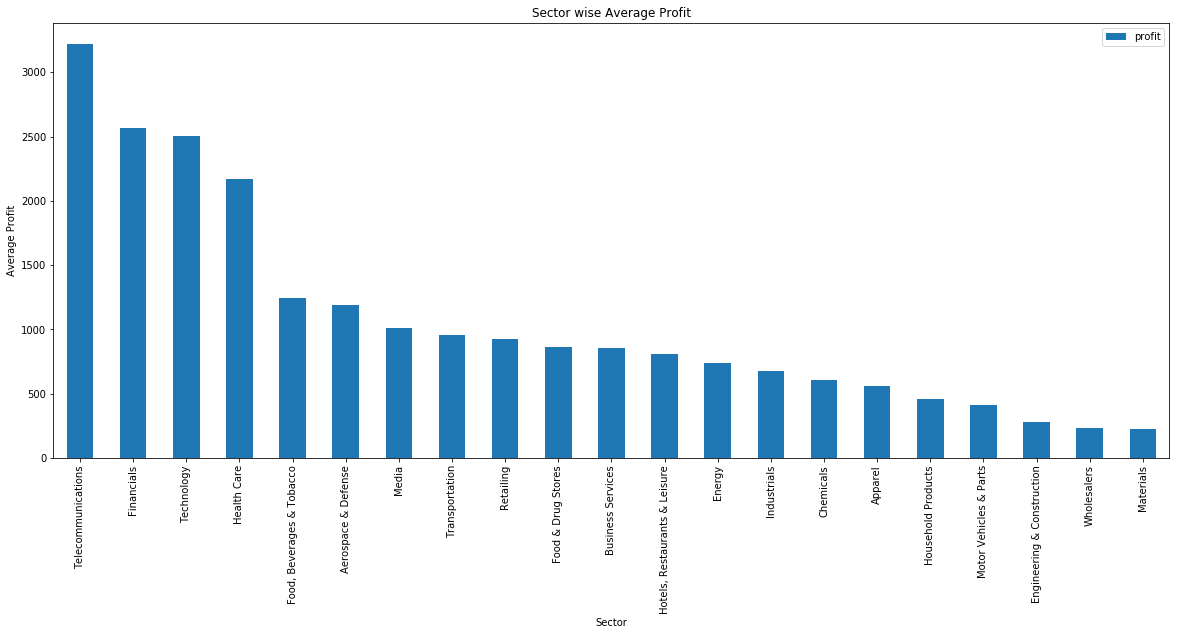

In [108]:
sector_data = data[["profit","sector",]]
sector_data = sector_data.groupby(['sector']).mean()
sector_data = sector_data.sort_values(by=['profit'],ascending = False)
plot = sector_data.plot.bar(y='profit', figsize=(20, 8))
plot.set_xlabel("Sector")
plot.set_ylabel("Average Profit")
plot.set_title("Sector wise Average Profit")

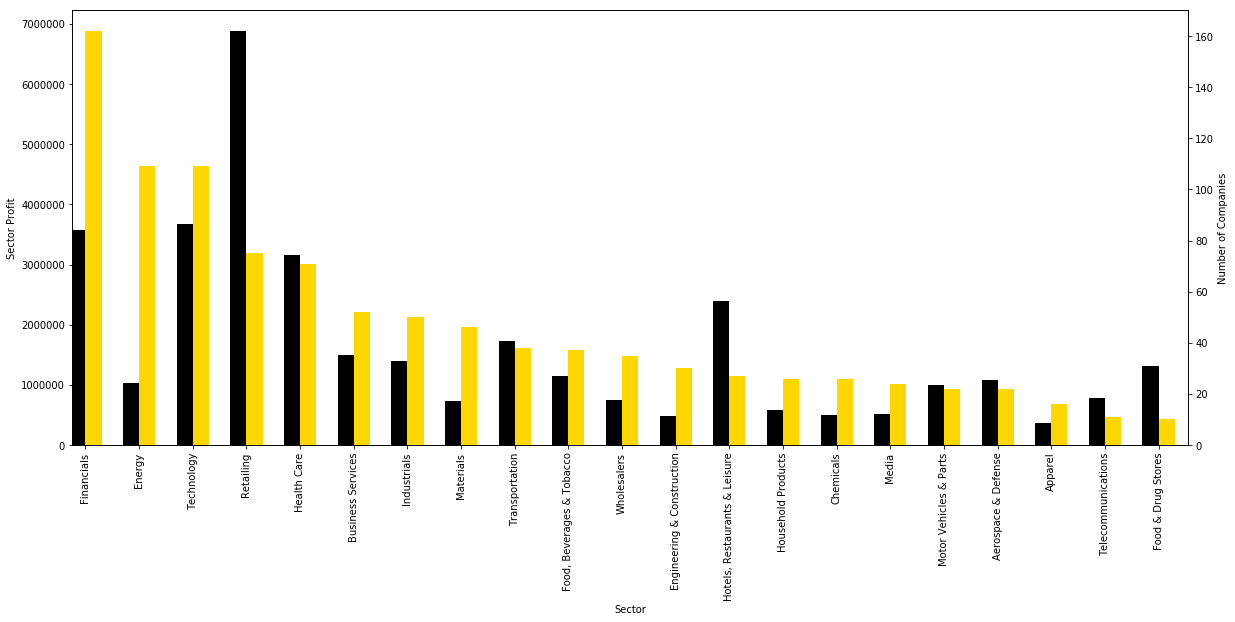

In [109]:
sector_data = data[["num. of employees","company","sector",]]
sector_data = sector_data.rename(columns={"num. of employees": "Num_Employees"})
sector_data = sector_data.groupby(['sector']).agg({'company':'count','Num_Employees':'sum'})
sector_data = sector_data.sort_values(by=['company'],ascending = False)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = .3

sector_data.Num_Employees.plot(kind='bar', color='black', ax=ax, width=width, position=1,figsize=(20, 8))
sector_data.company.plot(kind='bar', color='gold', ax=ax2, width=width, position=0,figsize=(20, 8))

ax.set_ylabel('Sector Profit')
ax.set_xlabel('Sector')
ax2.set_ylabel('Number of Companies')

plt.show()

Text(0.5, 1.0, 'Sector wise Average Number of Employees')

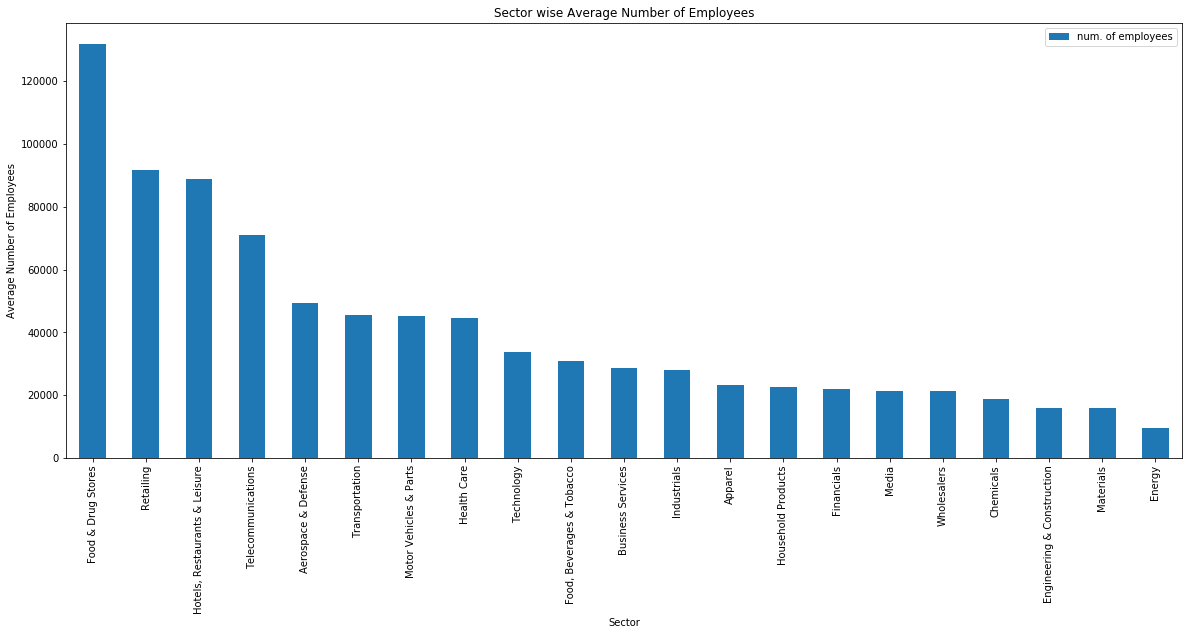

In [110]:
sector_data = data[["num. of employees","sector",]]

sector_data = sector_data.groupby(['sector']).mean()
sector_data = sector_data.sort_values(by=['num. of employees'],ascending = False)

plot = sector_data.plot.bar(y='num. of employees', figsize=(20, 8))
plot.set_xlabel("Sector")
plot.set_ylabel("Average Number of Employees")
plot.set_title("Sector wise Average Number of Employees")

## Regression

In [111]:
df = data.copy()
df.head()

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,ceo,website,ticker,market cap,market cap type,is profitable
0,Walmart,1,0.0,523964.0,14881.0,2200000,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,411690.0,large cap,True
1,Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,yes,no,yes,5.0,Jeffrey P. Bezos,https://www.amazon.com,AMZN,1637405.0,large cap,True
2,Exxon Mobil,3,-1.0,264938.0,14340.0,74900,Energy,Irving,TX,no,no,no,yes,2.0,Darren W. Woods,https://www.exxonmobil.com,XOM,177923.0,large cap,True
3,Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,https://www.apple.com,AAPL,2221176.0,large cap,True
4,CVS Health,5,3.0,256776.0,6634.0,290000,Health Care,Woonsocket,RI,no,no,yes,yes,8.0,Karen S. Lynch,https://www.cvshealth.com,CVS,98496.0,large cap,True


In [112]:
# Encoding 3 categorical columns (CEO_Woman, CEO_Founder, Profitable)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col = df[['ceo_founder','ceo_woman','profitable']]

for i in col:
    df[i] = le.fit_transform(df[i])

df.head()

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,ceo,website,ticker,market cap,market cap type,is profitable
0,Walmart,1,0.0,523964.0,14881.0,2200000,Retailing,Bentonville,AR,no,0,0,1,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,411690.0,large cap,True
1,Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,1,0,1,5.0,Jeffrey P. Bezos,https://www.amazon.com,AMZN,1637405.0,large cap,True
2,Exxon Mobil,3,-1.0,264938.0,14340.0,74900,Energy,Irving,TX,no,0,0,1,2.0,Darren W. Woods,https://www.exxonmobil.com,XOM,177923.0,large cap,True
3,Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,0,0,1,3.0,Timothy D. Cook,https://www.apple.com,AAPL,2221176.0,large cap,True
4,CVS Health,5,3.0,256776.0,6634.0,290000,Health Care,Woonsocket,RI,no,0,1,1,8.0,Karen S. Lynch,https://www.cvshealth.com,CVS,98496.0,large cap,True


In [113]:
# Removing columns not to be used in regression

df = df.drop(['rank', 'rank_change', 'company', 'newcomer', 'prev_rank', 'ceo', 'website', 'ticker','market cap type','sector','city','state','profitable'], axis=1)
df.head()

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [114]:
# Train-Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [115]:
y_test

754      3145.0
262     12067.0
821      2820.0
269     11809.0
311     10168.0
141     22408.0
565      4770.4
361      8750.7
251     12672.7
529      5249.0
150     21624.0
557      4868.0
393      8094.0
886      2406.9
753      3145.4
749      3164.4
857      2606.6
21     124813.0
983      2042.0
3      260174.0
472      6242.8
162     20173.3
426      7213.7
224     14300.0
72      44116.6
833      2729.6
598      4467.0
24     113589.0
752      3156.0
467      6343.2
         ...   
772      3055.4
153     21335.7
230     13989.0
723      3351.6
117     25599.7
919      2299.5
274     11548.0
255     12574.0
111     27754.0
489      5870.0
669      3680.8
345      9165.3
329      9709.0
370      8526.5
458      6547.0
673      3662.0
951      2175.2
539      5140.1
655      3868.1
675      3627.2
741      3230.8
916      2311.7
259     12301.0
725      3337.0
68      46840.0
355      8906.3
284     11171.3
104     31900.5
601      4438.0
77      42951.0
Name: revenue, Length: 2

In [116]:
# Scaling X

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

C:\Users\adith\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning:

Data with input dtype bool, int32, int64, float64 were all converted to float64 by StandardScaler.

C:\Users\adith\Miniconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype bool, int32, int64, float64 were all converted to float64 by StandardScaler.

C:\Users\adith\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning:

Data with input dtype bool, int32, int64, float64 were all converted to float64 by StandardScaler.



In [117]:
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
# R square score

y_pred = lr.predict(X_test)
r2 = lr.score(X_test, y_test)
print ("R^2 Score = {:.2f}".format(r2))

R^2 Score = 0.64


In [119]:
print (lr.coef_)

[12020.512906   21111.97636441   -85.96177934   -40.01958686
   603.56331564 -1342.21000736]


In [120]:
#Result Comparison

result = pd.DataFrame(y_test)
result['prediction'] = y_pred
result.head()

,revenue,prediction
754,3145.0,7110.850623
262,12067.0,10200.373144
821,2820.0,3409.641704
269,11809.0,7299.892286
311,10168.0,11653.105994


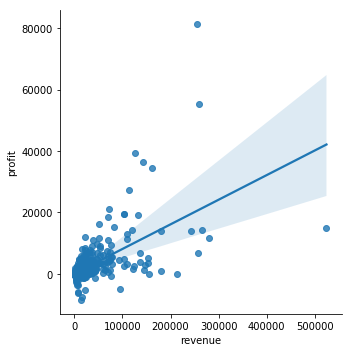

In [121]:
sns.lmplot(data=data,x='revenue', y='profit')